In [7]:
import numpy as np
import random

import math
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import hermite
from scipy.constants import c, h, k

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

import sys
sys.path.append('./../../')  # Add the parent directory to Python path
from plot_utils import *

# Get Data

In [6]:
df_unop_V_1 = pd.read_csv('../data/2019_confocal_cavity/confocal_data/190819_unop_V.csv')
df_unop_V_1

,camera position (mm),trans ratio (incident 6530.9047 mV)
0,0,0.189866
1,8,0.100446
2,12,0.099221
3,15,0.087584
4,19,0.079009
5,22,0.077172
6,28,0.074109
7,30,0.047467
8,34,0.029399
9,40,0.019599


In [7]:
df_op_V_1 = pd.read_csv('../data/2019_confocal_cavity/confocal_data/190819_op_V.csv')
df_op_V_1

,camera position (mm),trans ratio (incident 6530.9047 mV)
0,0,0.189866
1,7,0.124332
2,10,0.127088
3,12,0.113307
4,15,0.099527
5,20,0.076559
6,26,0.079621
7,30,0.075947
8,35,0.072272
9,41,0.048385


In [8]:
df_unop_H_1 = pd.read_csv('../data/2019_confocal_cavity/confocal_data/190820_unop_H.csv')
df_unop_H_1

,d (mm),trans ratio (incident 700 mV),H-rev (on rotational mount),cam pos (mm)
0,0.000000,0.114286,0.000000,0
1,0.040937,0.085714,2.000000,5
2,0.081883,0.064286,4.000000,8
3,0.122849,0.064286,6.000000,12
4,0.163843,0.064286,8.000000,14
5,0.204876,0.055714,10.000000,18
6,0.262605,0.055714,12.809730,23
7,0.310239,0.055714,15.123742,27
8,0.369921,0.047143,18.016256,32
9,0.429785,0.042857,20.908770,37


In [9]:
df_op_H_1 = pd.read_csv('../data/2019_confocal_cavity/confocal_data/190820_op_H.csv')
df_op_H_1

,d (mm),trans ratio (incident 700 mV),H-rev (on rotational mount),cam pos (mm)
0,0.000000,0.200000,0.000000,0.0
1,0.040937,0.145714,2.000000,NaN
2,0.081883,0.078571,4.000000,NaN
3,0.122849,0.078571,6.000000,NaN
4,0.163843,0.071429,8.000000,NaN
5,0.204876,0.068571,10.000000,NaN
6,0.238820,0.075714,11.652725,21.0
7,0.346028,0.075714,16.859250,30.0
8,0.465803,0.062857,22.644279,40.0
9,0.586493,0.047143,28.429307,50.0


In [10]:
df_unop_V_2 = pd.read_csv('../data/2019_confocal_cavity/confocal_data/1908_unop_V.csv')
df_unop_V_2

,d (mm),trans ratio (incident 1180 mV),V-rev (on rotational mount),cam pos (mm)
0,0.017745,0.116949,0.8670,0.0
1,0.165077,0.055085,8.0602,14.0
2,0.291744,0.050847,14.2258,26.0
3,0.440366,0.032203,21.4190,40.0
4,0.515150,0.031356,25.0156,47.0
5,0.238904,0.055932,11.6568,21.0
6,0.144010,0.055932,7.0326,12.0
7,0.133479,0.058475,6.5188,11.0
8,-0.076911,0.061017,-3.7572,-9.0
9,-0.140062,0.059322,-6.8400,-15.0


In [11]:
df_op_V_2 = pd.read_csv('../data/2019_confocal_cavity/confocal_data/1908_op_V.csv')
df_op_V_2

,d (mm),trans ratio (incident 1180 mV),V-rev (on rotational mount),cam pos (mm)
0,0.000000,0.148305,0.000000,0.0
1,0.020468,0.145763,1.000000,NaN
2,0.040937,0.120339,2.000000,NaN
3,0.061408,0.095763,3.000000,5.0
4,0.081883,0.080508,4.000000,6.0
5,0.102363,0.072881,5.000000,8.0
6,-0.020468,0.145763,-1.000000,NaN
7,-0.040937,0.121186,-2.000000,-5.0
8,-0.061408,0.092373,-3.000000,-8.0
9,-0.081883,0.076271,-4.000000,-9.0


In [12]:
df_unop_H_2 = pd.read_csv('../data/2019_confocal_cavity/confocal_data/1908_unop_H.csv')
df_unop_H_2

,d (mm),trans ratio (incident 1180 mV),H-rev (on rotational mount),cam pos (mm)
0,0.594546,0.017797,28.813436,40.0
1,0.519987,0.017797,25.247611,35.0
2,0.416247,0.019492,20.255456,28.0
3,0.298423,0.018644,14.550136,20.0
4,0.254398,0.024576,12.410640,17.0
5,0.151920,0.044068,7.418485,10.0
6,0.093470,0.064407,4.565825,6.0
7,0.000000,0.101695,0.000000,0.0
8,-0.040937,0.084746,-2.000000,NaN
9,-0.081883,0.058475,-4.000000,NaN


In [13]:
df_op_H_2 = pd.read_csv('../data/2019_confocal_cavity/confocal_data/1908_op_H.csv')
df_op_H_2

,d (mm),trans ratio (incident 1180 mV),H-rev (on rotational mount),cam pos (mm)
0,0.000000,0.122881,0.000000,NaN
1,0.061408,0.118644,3.000000,NaN
2,0.122849,0.068644,6.000000,NaN
3,0.184354,0.062712,9.000000,NaN
4,0.283740,0.062712,13.836970,19.0
5,0.371982,0.060169,18.115961,25.0
6,0.534866,0.042373,25.960776,36.0
7,0.699686,0.032203,33.805591,47.0
8,0.928643,0.020339,44.503067,62.0
9,1.292415,0.016949,60.905862,85.0


# Plotting

## First Set 190819, 190820

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/3213052309.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/3213052309.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


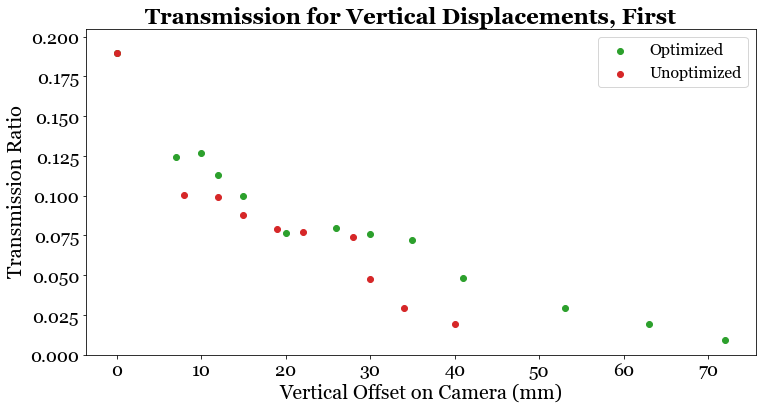

In [76]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

d_unop = df_unop_V_1.iloc[:, 0]
T_unop = df_unop_V_1.iloc[:, 1]

d_op = df_op_V_1.iloc[:, 0]
T_op = df_op_V_1.iloc[:, 1]

ax.scatter(d_op, T_op, color=tableau_colors[2], label='Optimized') 
ax.scatter(d_unop, T_unop, color=tableau_colors[3], label='Unoptimized') 

# Customize tick sizes
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.3f}'))  # Format y-tick labels to 2 decimal places

ax.set_ylim(0, 0.205)

# Customize the plot (optional)
ax.set_xlabel('Vertical Offset on Camera (mm)', fontdict=font)
ax.set_ylabel('Transmission Ratio', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Transmission for Vertical Displacements, First', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/confocal_V_1.png', bbox_inches='tight')
# plt.savefig('../plots/confocal_V_1.pdf', bbox_inches='tight')
plt.show()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/266312265.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/266312265.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


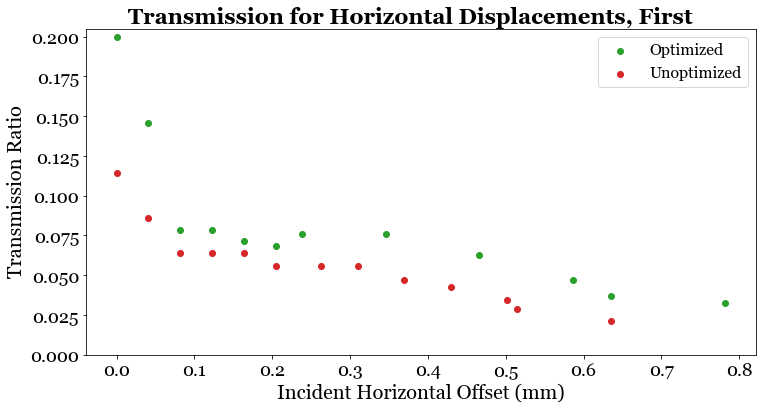

In [77]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

d_unop = df_unop_H_1.iloc[:, 0]
T_unop = df_unop_H_1.iloc[:, 1]

d_op = df_op_H_1.iloc[:, 0]
T_op = df_op_H_1.iloc[:, 1]

ax.scatter(d_op, T_op, color=tableau_colors[2], label='Optimized') 
ax.scatter(d_unop, T_unop, color=tableau_colors[3], label='Unoptimized') 

# Customize tick sizes
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.3f}'))  # Format y-tick labels to 2 decimal places

ax.set_ylim(0, 0.205)

# Customize the plot (optional)
ax.set_xlabel('Incident Horizontal Offset (mm)', fontdict=font)
ax.set_ylabel('Transmission Ratio', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Transmission for Horizontal Displacements, First', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/confocal_H_1.png', bbox_inches='tight')
# plt.savefig('../plots/confocal_H_1.pdf', bbox_inches='tight')
plt.show()

## Second Set 1908

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/2943945187.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/2943945187.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


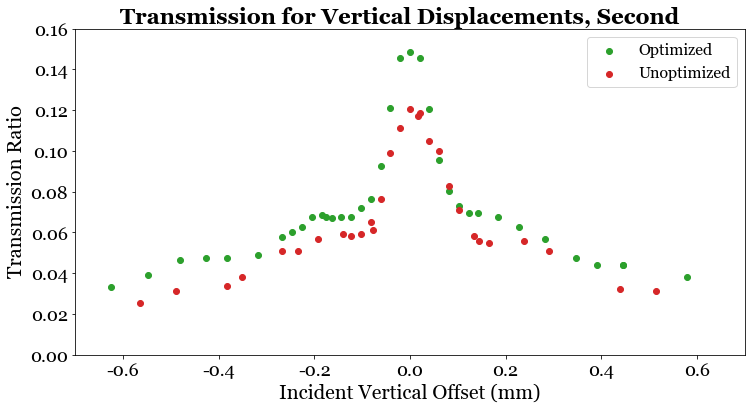

In [78]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

d_unop = df_unop_V_2.iloc[:, 0]
T_unop = df_unop_V_2.iloc[:, 1]

d_op = df_op_V_2.iloc[:, 0]
T_op = df_op_V_2.iloc[:, 1]

ax.scatter(d_op, T_op, color=tableau_colors[2], label='Optimized') 
ax.scatter(d_unop, T_unop, color=tableau_colors[3], label='Unoptimized') 

# Customize tick sizes
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))  # Format y-tick labels to 2 decimal places

ax.set_xlim(-0.7, 0.7)
ax.set_ylim(0, 0.16)

# Customize the plot (optional)
ax.set_xlabel('Incident Vertical Offset (mm)', fontdict=font)
ax.set_ylabel('Transmission Ratio', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Transmission for Vertical Displacements, Second', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/confocal_V_2.png', bbox_inches='tight')
# plt.savefig('../plots/confocal_V_2.pdf', bbox_inches='tight')
plt.show()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/411782983.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/411782983.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


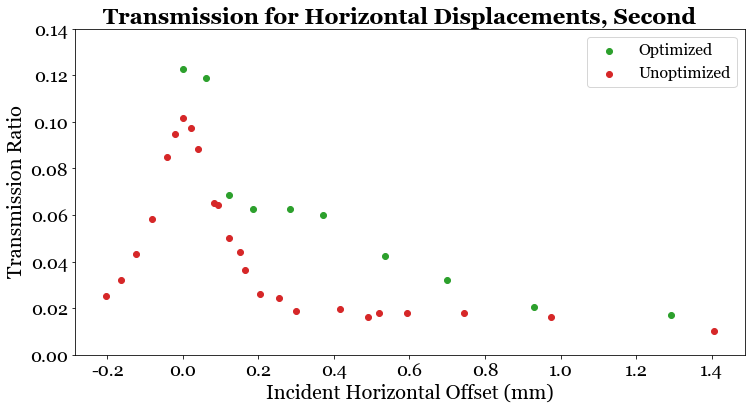

In [79]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

d_unop = df_unop_H_2.iloc[:, 0]
T_unop = df_unop_H_2.iloc[:, 1]

d_op = df_op_H_2.iloc[:, 0]
T_op = df_op_H_2.iloc[:, 1]

ax.scatter(d_op, T_op, color=tableau_colors[2], label='Optimized') 
ax.scatter(d_unop, T_unop, color=tableau_colors[3], label='Unoptimized') 

# Customize tick sizes
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))  # Format y-tick labels to 2 decimal places

# ax.set_xlim(-0.8, 0.8)
ax.set_ylim(0, 0.14)

# Customize the plot (optional)
ax.set_xlabel('Incident Horizontal Offset (mm)', fontdict=font)
ax.set_ylabel('Transmission Ratio', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Transmission for Horizontal Displacements, Second', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/confocal_H_2.png', bbox_inches='tight')
# plt.savefig('../plots/confocal_H_2.pdf', bbox_inches='tight')
plt.show()

## Sample Calibration

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/658626343.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5200/658626343.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


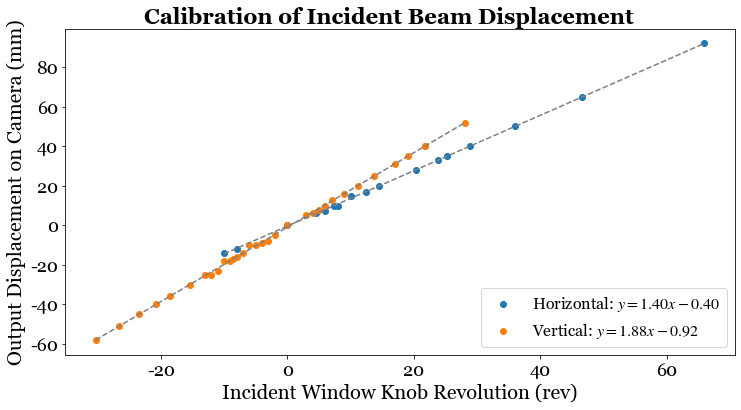

In [80]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a * x + b


fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
df_unop_H_2
df_op_V_2

d_rev_H = df_unop_H_2.iloc[:, 2].astype(float)
d_cam_H = df_unop_H_2.iloc[:, 3].astype(float)

d_rev_V = df_op_V_2.iloc[:, 2].astype(float)
d_cam_V = df_op_V_2.iloc[:, 3].astype(float)

# Remove NaN values
mask_H = ~np.isnan(d_rev_H) & ~np.isnan(d_cam_H)
d_rev_H, d_cam_H = d_rev_H[mask_H], d_cam_H[mask_H]

mask_V = ~np.isnan(d_rev_V) & ~np.isnan(d_cam_V)
d_rev_V, d_cam_V = d_rev_V[mask_V], d_cam_V[mask_V]

# Fit lines of best fit using curve_fit
popt_H, _ = curve_fit(linear, d_rev_H, d_cam_H)
popt_V, _ = curve_fit(linear, d_rev_V, d_cam_V)

# Plot lines of best fit
x_H = np.linspace(d_rev_H.min(), d_rev_H.max(), 100)
ax.plot(x_H, linear(x_H, *popt_H), color=tableau_colors[7], linestyle='--')

x_V = np.linspace(d_rev_V.min(), d_rev_V.max(), 100)
ax.plot(x_V, linear(x_V, *popt_V), color=tableau_colors[7], linestyle='--')

# Display equations
equation_H = f'$y = {popt_H[0]:.2f}x {popt_H[1]:.2f}$'
equation_V = f'$y = {popt_V[0]:.2f}x {popt_V[1]:.2f}$'

ax.scatter(d_rev_H, d_cam_H, color=tableau_colors[0], label='Horizontal: ' + equation_H) 
ax.scatter(d_rev_V, d_cam_V, color=tableau_colors[1], label='Vertical: ' + equation_V) 

# Customize tick sizes
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))  # Format y-tick labels to 2 decimal places

# ax.set_xlim(-0.8, 0.8)
# ax.set_ylim(0, 0.14)

# Customize the plot (optional)
ax.set_xlabel('Incident Window Knob Revolution (rev)', fontdict=font)
ax.set_ylabel('Output Displacement on Camera (mm)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Calibration of Incident Beam Displacement', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/confocal_calibration.png', bbox_inches='tight')
# plt.savefig('../plots/confocal_calibration.pdf', bbox_inches='tight')
plt.show()

# Finesse ringdown

In [48]:
finesse_ringdown = pd.read_csv('../data/2019_confocal_cavity/finesse_ringdown/DS0026.csv', skiprows=30)
finesse_ringdown

,-4.996000e-06,4.80e-02,Unnamed: 2
0,-0.000005,0.056,NaN
1,-0.000005,0.048,NaN
2,-0.000005,0.056,NaN
3,-0.000005,0.048,NaN
4,-0.000005,0.056,NaN
...,...,...,...
9990,0.000005,0.056,NaN
9991,0.000005,0.048,NaN
9992,0.000005,0.056,NaN
9993,0.000005,0.048,NaN


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1145/4255671481.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1145/4255671481.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


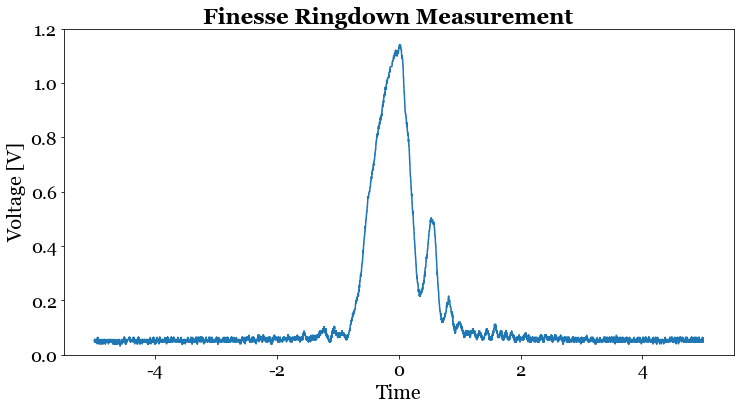

In [53]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

t_unop = finesse_ringdown.iloc[:, 0]
V_unop = finesse_ringdown.iloc[:, 1]

ax.plot(t_unop * 1e6, V_unop)

# Customize tick sizes
# ax.set_xlim(-500, 1250)
ax.set_ylim(0, 1.2)

ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # Format y-tick labels to 2 decimal places

# Customize the plot (optional)
ax.set_xlabel('Time', fontdict=font)
ax.set_ylabel('Voltage [V]', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Finesse Ringdown Measurement', fontproperties=suptitle_font, y=0.93)

# Show the plot
# plt.savefig('../plots/finesse_ringdown.png', bbox_inches='tight')
# plt.savefig('../plots/finesse_ringdown.pdf', bbox_inches='tight')
plt.show()

# Finesse sideband

In [2]:
finesse_sideband = pd.read_csv('../data/2019_confocal_cavity/finesse_sideband/DS0088.csv', skiprows=30)
finesse_sideband

,-2.498000e-03,1.70e-01,Unnamed: 2
0,-0.002498,0.166,NaN
1,-0.002497,0.152,NaN
2,-0.002497,0.168,NaN
3,-0.002496,0.166,NaN
4,-0.002495,0.154,NaN
...,...,...,...
9990,0.002498,0.282,NaN
9991,0.002498,0.236,NaN
9992,0.002498,0.254,NaN
9993,0.002499,0.278,NaN


Fitted Parameters:
T0: 0.122, Finesse: -3688.886, Resonance Frequency: 2.614e+09 Hz
Delta_nu: 16043265.324 Hz, Sideband Intensity: 0.081, Sideband Finesse: -1502.708, Sideband Separation: -40360984137.433 Hz


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_2017/3532514987.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_2017/3532514987.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


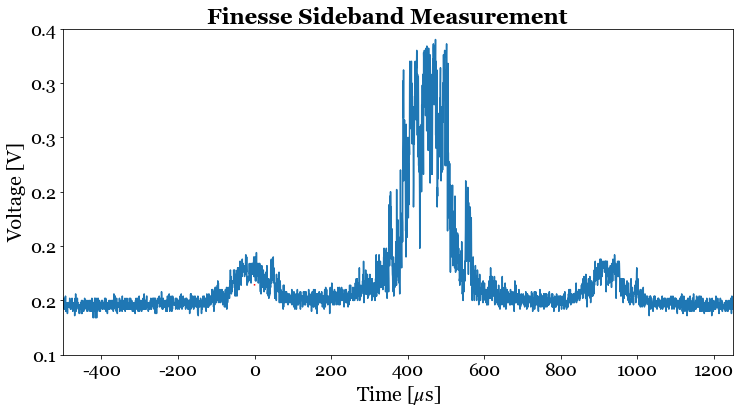

In [6]:
t_unop = finesse_sideband.iloc[:, 0]
V_unop = finesse_sideband.iloc[:, 1]

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(t_unop * 1e6, V_unop)

# Fit
# Define the fit function with a main peak and two sidebands
def fit_function(nu, T0, F, nu0, Delta_nu, Ts, Fs, Delta_nu_s):
    main_peak = T0 * (F**2 / (F**2 + ((nu - nu0) / Delta_nu)**2))
    sideband1 = Ts * (Fs**2 / (Fs**2 + ((nu - (nu0 + Delta_nu_s)) / Delta_nu)**2))
    sideband2 = Ts * (Fs**2 / (Fs**2 + ((nu - (nu0 - Delta_nu_s)) / Delta_nu)**2))
    return main_peak + sideband1 + sideband2

# Generate synthetic data for demonstration
# Parameters for the synthetic data
nu0_true = 100e6  # Resonance frequency (in Hz)
Delta_nu_true = 5e6  # FWHM of the main peak (in Hz)
Delta_nu_s = 20e6  # Sideband separation (in Hz)
T0_true = 1.0  # Peak intensity
Ts_true = 0.2  # Sideband intensity
F_true = 200  # Finesse
Fs_true = 100  # Sideband finesse

# Fit the model to the data
initial_guess = [1.0, 200, 100e6, 5e6, 0.2, 100, 20e6]
popt, pcov = curve_fit(fit_function, t_unop, V_unop, p0=initial_guess)

# Extracting the fitted parameters
T0_fit, F_fit, nu0_fit, Delta_nu_fit, Ts_fit, Fs_fit, Delta_nu_s_fit = popt
plt.plot(t_unop, fit_function(t_unop, *popt), label='Fit', color='red')

# Print fitted parameters
print("Fitted Parameters:")
print(f"T0: {T0_fit:.3f}, Finesse: {F_fit:.3f}, Resonance Frequency: {nu0_fit:.3e} Hz")
print(f"Delta_nu: {Delta_nu_fit:.3f} Hz, Sideband Intensity: {Ts_fit:.3f}, Sideband Finesse: {Fs_fit:.3f}, Sideband Separation: {Delta_nu_s_fit:.3f} Hz")

# Customize tick sizes
ax.set_xlim(-500, 1250)
ax.set_ylim(0.1, 0.4)

ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # Format y-tick labels to 2 decimal places

# Customize the plot (optional)
ax.set_xlabel('Time [$\mu$s]', fontdict=font)
ax.set_ylabel('Voltage [V]', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Finesse Sideband Measurement', fontproperties=suptitle_font, y=0.93)
# plt.legend(loc='lower right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/finesse_sideband.png', bbox_inches='tight')
# plt.savefig('../plots/finesse_sideband.pdf', bbox_inches='tight')
plt.show()

# High-NA Cavity

In [8]:
mirror_coating = pd.read_csv('../data/2019_confocal_cavity/higher_order_data/higher_order_data.csv')
mirror_coating

,lambda_AOI=0,reflection_AOI=0,lambda_AOI=10,reflection_AOI=10,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,750.473669,99.008032,754.757282,99.005737,NaN,NaN,NaN
1,750.473669,99.018359,754.804354,99.026391,NaN,NaN,NaN
2,750.520741,99.034423,754.851427,99.045898,NaN,NaN,NaN
3,750.709032,99.056225,755.086790,99.073437,NaN,NaN,NaN
4,750.756105,99.074584,755.180936,99.099828,NaN,NaN,NaN
...,...,...,...,...,...,...,...
97,NaN,NaN,810.726684,99.123924,NaN,NaN,NaN
98,NaN,NaN,810.820830,99.097533,NaN,NaN,NaN
99,NaN,NaN,811.009120,99.069994,NaN,NaN,NaN
100,NaN,NaN,811.103266,99.044750,NaN,NaN,NaN


In [9]:
lambda_0 = mirror_coating.iloc[:, 0]
r_0 = mirror_coating.iloc[:, 1]
lambda_10 = mirror_coating.iloc[:, 2]
r_10 = mirror_coating.iloc[:, 3]

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_2017/1692753548.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_2017/1692753548.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


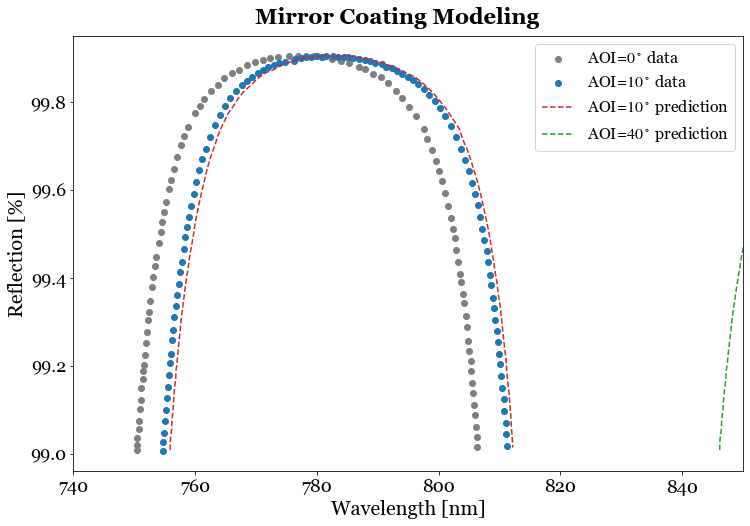

In [40]:
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

ax.scatter(lambda_0, r_0, color=tableau_colors[7], label='AOI=$0^\circ$ data') 
ax.scatter(lambda_10, r_10, color=tableau_colors[0], label='AOI=$10^\circ$ data') 

n = 1.4537
lambda_10_predicted = lambda_0 / np.cos(np.deg2rad(10)/n)
ax.plot(lambda_10_predicted, r_0, color=tableau_colors[3], linestyle='--', label='AOI=$10^\circ$ prediction')

lambda_40_predicted = lambda_0 / np.cos(np.deg2rad(40)/n)
ax.plot(lambda_40_predicted, r_0, color=tableau_colors[2], linestyle='--', label='AOI=$40^\circ$ prediction')

# Customize tick sizes
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # Format y-tick labels to 2 decimal places

ax.set_xlim(740, 850)

# Customize the plot (optional)
ax.set_xlabel('Wavelength [nm]', fontdict=font)
ax.set_ylabel('Reflection [%]', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Mirror Coating Modeling', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/mirror_coating.png', bbox_inches='tight')
# plt.savefig('../plots/mirror_coating.pdf', bbox_inches='tight')
plt.show()